## 24W-COM SCI-M148 Homework 2 Coding Question

Name: Jacob Sayono

UID: 505368811

### **Submission Guidelines**
1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. As the PDF can get long, please tag the respective sections to ensure the readers know where to look.  

# Perceptron

## Part (a)

Given the Perceptron training algorithm and the dataset $D = \{(x_i, y_i)\}, i = 1 \ldots 5$, where each $x_i$ is a vector in $\mathbb{R}^d$ including a bias term (i.e., $x_i = [1, x_{i1}, \ldots, x_{id-1}]$), the weight vector $w$ after one training epoch, during which mistakes were made on three data points: $(x_1, y_1), (x_3, y_3), (x_4, y_4)$, can be calculated as follows. Starting with $w=0$, the weight update rule $w \leftarrow w + y_i x_i$ is applied each time the model makes a mistake. Thus, after one epoch, the weight vector $w$ will be:

$$
w = y_1 x_1 + y_3 x_3 + y_4 x_4
$$

This equation incorporates the updates from the specific data points on which the model made mistakes, leveraging the indices $i \in \{1, 3, 4\}$ that are indicated by the algorithm's performance.

## Part (b)

Given $d = 3$ and specific data points:

- $x_{i,1} = 1$ (bias term, for all $i$),
- $x_{i,2} = [1, 2, 1, 3, 1]$,
- $x_{i,3} = [0, -1, -3, -1, -1]$,
- $y_i = [+1, +1, -1, +1, +1]$,

and knowing that mistakes were made on data points $(x_1, y_1)$, $(x_3, y_3)$, and $(x_4, y_4)$, we can calculate $w$ as:

$$
w = y_1 x_1 + y_3 x_3 + y_4 x_4 = [+1 \cdot [1, 1, 0]] + [-1 \cdot [1, 1, -3]] + [+1 \cdot [1, 3, -1]] = [3, 3, -4]
$$

Thus, the weight vector $w$ after the first epoch is $[3, 3, -4]$.

To check if the model will make a mistake on $x_1 = [1, 1, 0]$ again, we evaluate $y = \text{sgn}(w^\top x_1)$. Given $w = [3, 3, -4]$, the prediction on $x_1$ will be:

$$
y = \text{sgn}([3, 3, -4]^\top [1, 1, 0]) = \text{sgn}(3 + 3) = \text{sgn}(6) = +1
$$

Since $y_1 = +1$, the model will not make a mistake on $x_1$ if iterated through the dataset again.

## Part (c)

One key difference between the Perceptron model and the logistic regression model is in the way they estimate the probability of the outcomes and make decisions:

- **Perceptron Model:** It uses a sign function as its activation function, where the output is binary ($+1$ or $-1$). The decision boundary is linear, and the model updates its weights based on whether it makes a mistake in classifying the training examples. It does not provide probabilities for the classifications, rather it directly classifies instances based on the sign of the weighted sum of inputs.

- **Logistic Regression Model:** Unlike the Perceptron, logistic regression estimates probabilities using the logistic function (sigmoid function), which outputs values between 0 and 1. These probabilities are then used to classify instances based on a threshold (commonly 0.5). Logistic regression is also a linear model but it focuses on estimating probabilities rather than just making a binary decision.

# Neural Networks

## Part (a)

For the hidden layers, a wide range of activation functions can be used. Common choices include:

- **ReLU (Rectified Linear Unit):** ReLU is a popular choice due to its simplicity and efficiency. It helps with the vanishing gradient problem, allowing deeper networks by providing a non-linear transformation with a simple max(0, x) function. Its simplicity leads to faster computation.

- **Sigmoid:** Though not as common for hidden layers due to its susceptibility to the vanishing gradient problem, it can still be used, especially in smaller networks. It provides a smooth, differentiable function that outputs values in the (0, 1) range.

- **Tanh (Hyperbolic Tangent):** Similar to the sigmoid, but outputs values in the (-1, 1) range. It is often preferred over the sigmoid for hidden layers because it centers the data, improving the learning for the next layer.

For the output layer, the choice is more restricted due to the nature of the problem:

- **Sigmoid:** For binary classification, the sigmoid function is a natural choice for the output layer because it outputs a probability distribution over two classes. It squashes the output to a range between 0 and 1, making it interpretable as a probability for class 1 (with the probability for class 0 being 1 minus the output).

The choice of activation function for the hidden layers depends on the specific characteristics of the problem and the network architecture, aiming to enhance non-linearity without causing training issues. For the output layer, the sigmoid function is typically used in binary classification problems to interpret the neural network output as a probability.

## Part (b)

Given the input $X_1 = 2$ and $X_2 = -3$ with the weights initialized as $W_{11} = 0.9$, $W_{12} = 0.4$, $W_{21} = -1.5$, $W_{22} = -0.7$, $W_{31} = -0.2$, $W_{32} = 1.6$, and the bias terms $W_{10}$, $W_{20}$, $W_{30}$ all initialized to 0, we can compute the output of the network as follows:

In [20]:
import numpy as np

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def linear(x):
    return x

# Inputs
X = np.array([2, -3])

# Weights
W_11, W_12 = 0.9, 0.4
W_21, W_22 = -1.5, -0.7
W_31, W_32 = -0.2, 1.6
W_10, W_20, W_30 = 0, 0, 0  # Biases

# Forward pass
# Hidden layer
hidden_input_1 = np.dot(X, np.array([W_11, W_21])) + W_10
hidden_output_1 = relu(hidden_input_1)

hidden_input_2 = np.dot(X, np.array([W_12, W_22])) + W_20
hidden_output_2 = sigmoid(hidden_input_2)

# Output layer
output_input = np.dot(np.array([hidden_output_1, hidden_output_2]), np.array([W_31, W_32])) + W_30
output = linear(output_input)

# Result
output_rounded = round(output, 2)
output_rounded

0.26

## Part (c)

The binary cross entropy (BCE) loss function, used for binary classification tasks, is defined as:

$$
L(y, \hat{y}) = -\left[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\right]
$$

where:
- $y$ is the true label (0 or 1),
- $\hat{y}$ is the predicted probability (output of the neural network).

Given that the true label $y = 1$ and the network output $\hat{y} = 0.26$ (from part (b)), we can substitute these values into the formula to calculate the loss:

$$
L(1, 0.26) = -\left[1 \log(0.26) + (1 - 1) \log(1 - 0.26)\right] = -\log(0.26)
$$

In [21]:
# True label and predicted output
y_true = 1
y_pred = 0.26

# Binary Cross Entropy Loss
loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
loss

1.3470736479666092

After computation, the loss of the network on the given data point is approximately $1.35$.

Furthermore, the derivative of the loss function with respect to $\hat{y}$, denoted as $\frac{\partial L}{\partial \hat{y}}$, is given by:

$$
\frac{\partial L}{\partial \hat{y}} = -\left[\frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}}\right]
$$

In [22]:
# Derivative of the loss function with respect to y_pred
loss_derivative = -(y_true / y_pred) + (1 - y_true) / (1 - y_pred)
loss_derivative

-3.846153846153846

Substituting $y = 1$ and $\hat{y} = 0.26$ into this derivative formula, we find the derivative to be approximately $-3.85$. This represents the rate of change of the loss with respect to the output of the network, indicating that for a small increase in $\hat{y}$, the loss is expected to decrease. The magnitude of the derivative shows how sensitive the loss is to changes in $\hat{y}$.

## Part (d): Derivative Calculation Corrected

To compute the derivative of the loss $L$ with respect to the weight $W_{12}$, we need to apply the chain rule for derivatives, considering the dependencies within the network's structure. Specifically, since $W_{12}$ directly influences the output of the first hidden neuron and through it, the final output $\hat{y}$, we follow the path of this influence for our calculation.

Given:
- The output of the neural network is denoted as $\hat{y}$.
- The activation function of the first neuron in the hidden layer is ReLU, denoted as $f_1$, and the second neuron uses a Sigmoid function, denoted as $f_2$.
- The input to the second neuron in the hidden layer, denoted as $z_2$, is $W_{12}X_1 + W_{22}X_2 + W_{20}$.

The derivative of the loss $L$ with respect to $W_{12}$ can be expressed through the chain rule as follows:

$$
\frac{\partial L}{\partial W_{12}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_{12}}
$$

Given that:
- The derivative of the loss with respect to $\hat{y}$, denoted as $\frac{\partial L}{\partial \hat{y}}$, is a value computed based on the loss function used (binary cross entropy in this case).
- $\frac{\partial \hat{y}}{\partial z_2}$ involves the derivative of the output layer's activation function with respect to its input, which in turn, for a linear activation function, is directly influenced by the activation of the preceding layer's neuron outputs, particularly the weight $W_{32}$ for the connection from the second neuron to the output.
- $\frac{\partial z_2}{\partial W_{12}}$ directly equates to the input $X_1$, because $z_2$'s definition as a linear combination of inputs includes $W_{12}$ multiplying $X_1$.

Thus, the formula simplifies and can be adjusted to accurately reflect the network's architecture and the direct path of influence from $W_{12}$ to $L$:

$$
\frac{\partial L}{\partial W_{12}} = \frac{\partial L}{\partial \hat{y}} \cdot W_{32} \cdot X_1
$$

Substituting the values, we get $\frac{\partial L}{\partial W_{12}} = (-3.85)(1.6)(2) = -12.32$

## Part (e)

To determine the total number of parameters in the neural network described in part (b), we need to count all the weights and bias terms. The network structure includes 2 inputs, 2 hidden neurons, and 1 output neuron. Let's break down the parameters:

- **Hidden Layer**:
  - Each hidden neuron has connections from all input nodes. Since there are 2 input nodes and 2 hidden neurons, this gives us $2 \times 2 = 4$ weight parameters.
  - Each hidden neuron also has a bias term. With 2 hidden neurons, we have $2$ bias parameters for the hidden layer.

- **Output Layer**:
  - The output neuron receives input from each of the 2 hidden neurons, contributing another $2$ weight parameters.
  - The output neuron has a single bias term, adding $1$ more parameter.

Therefore, the total number of parameters in the network is calculated as the sum of all weight and bias parameters:

$$
\text{Total Parameters} = (4 \text{ weights from input to hidden}) + (2 \text{ hidden biases}) + (2 \text{ weights from hidden to output}) + (1 \text{ output bias}) = 4 + 2 + 2 + 1 = 9
$$

This neural network has a total of **9 parameters**.

# Multi-class Classification

## Part (a)

In a multi-class classification problem using the One vs. Rest (OvR) strategy with logistic regression, a separate binary classifier is trained for each class against all the other classes. For a problem with 5 classes and 20 features:

- Each binary classifier for a class will have a parameter for each feature, plus a bias term.
- Since we have 20 features, this means each classifier will have $20 + 1 = 21$ parameters (20 weights and 1 bias).
- With 5 classes, we need to train 5 separate binary classifiers (one for each class).

Thus, the total number of parameters for the OvR strategy is:
$$
5 \text{ classes} \times 21 \text{ parameters/class} = 105 \text{ parameters}
$$

### Part (b)

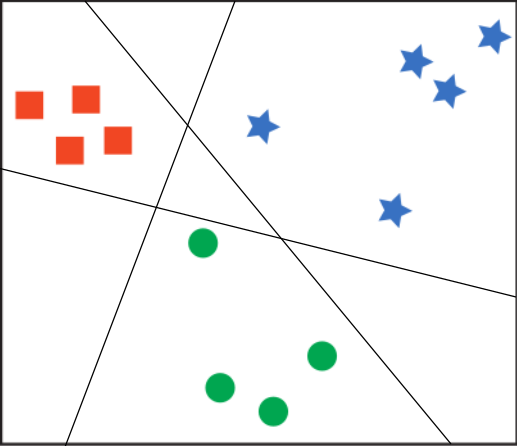

In [1]:
# One vs. Rest (OvR):
from IPython.display import Image, display
display(Image(filename="ovr.png"))

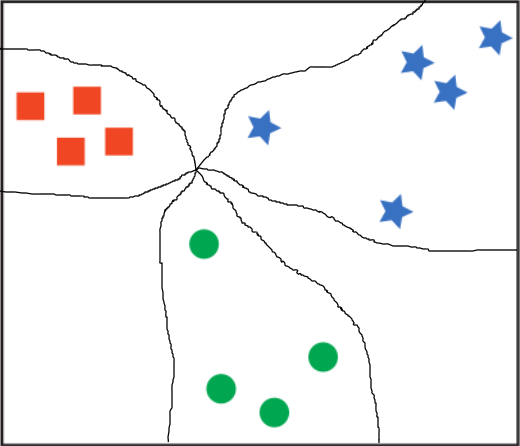

In [2]:
# Multinomial Approach:
from IPython.display import Image, display
display(Image(filename="mn.png"))

# Decision Boundary

The plots show the decision boundaries for a two-class classification problem, where one uses a neural network with a hidden layer of 10 ReLU units, and the other with a hidden layer of 10 tanh units.

- **Plot (a)** - This plot likely corresponds to the **Neural Network with 1 hidden layer of 10 ReLU units**. ReLU (Rectified Linear Unit) activations tend to create linear-like decision boundaries within the range of activation. The decision boundary in plot (a) shows several linear segments, which is characteristic of the piecewise linear functions formed by ReLU units. The ReLU units zero out negative inputs, leading to flat regions in the decision boundary, which is observed in the plot.

- **Plot (b)** - This plot is likely the result of the **Neural Network with 1 hidden layer of 10 tanh units**. The tanh activation function can output values in the range of \([-1, 1]\) and is capable of creating more S-shaped (sigmoidal) decision boundaries due to its non-linear properties. The decision boundary in plot (b) exhibits a smooth curve, which suggests the non-linear activations of the tanh units, allowing for a more nuanced separation of classes that better captures the curvature of the data distribution.

These assignments are made based on the characteristic shapes of the decision boundaries typically associated with the ReLU and tanh activation functions in neural networks.


# Overview
This coding question is about training and explaining what neural networks are doing with LIME (short for Local Interpretable Model-agnostic Explanations).

We use a small image dataset called MNIST. It is a dataset of handwritten digits that is commonly used for training image classification models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# make each image color so lime_image works correctly
X_vec = np.stack([gray2rgb(iimg) for iimg in mnist.data.values.reshape((-1, 28, 28))],0).astype(np.uint8)
y_vec = mnist.target.astype(np.uint8)

Text(0.5, 1.0, 'Digit: 5')

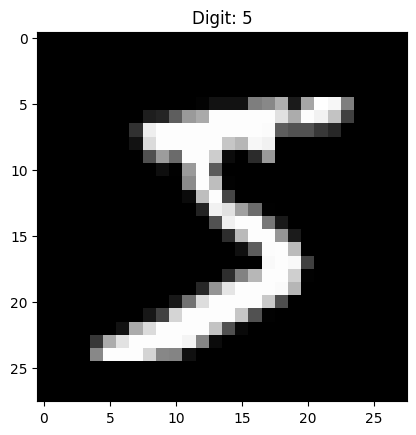

In [3]:
%matplotlib inline
fig, ax1 = plt.subplots(1,1)
ax1.imshow(X_vec[0], interpolation = 'none')
ax1.set_title('Digit: {}'.format(y_vec[0]))

# Setup a Pipeline
Here we make a pipeline for processing the images where basically we flatten the image back to 1d vectors and then use a neural network with one hidden layer.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer

class PipeStep(object):
    """
    Wrapper for turning functions into pipeline transforms (no-fitting)
    """
    def __init__(self, step_func):
        self._step_func=step_func
    def fit(self,*args):
        return self
    def transform(self,X):
        return self._step_func(X)


makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_nn_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('NN', MLPClassifier()) # This is a neural network with 1 hidden layer
    ])

Now, let's do the train-test split to have 55% data in the train set with the random state set to 0:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, train_size=0.55, random_state=0)

In [6]:
simple_nn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Make Gray', <__main__.PipeStep object at 0x7feffe2cac70>),
                ('Flatten Image', <__main__.PipeStep object at 0x7feffe2cad30>),
                ('NN', MLPClassifier())])

Now, let's get the training and test scores.

In [7]:
print('Training set score: ' + str(simple_nn_pipeline.score(X_train, y_train)))
print('Test set score: ' + str(simple_nn_pipeline.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.9731746031746031


In [8]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    %pip install lime
    import lime

In [9]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [10]:
%%time
explanation = explainer.explain_instance(X_test[0],
                                         classifier_fn = simple_nn_pipeline.predict_proba,
                                         top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 5.3 s, sys: 1.05 s, total: 6.35 s
Wall time: 5.43 s


Text(0.5, 1.0, 'Positive/Negative Regions for 0')

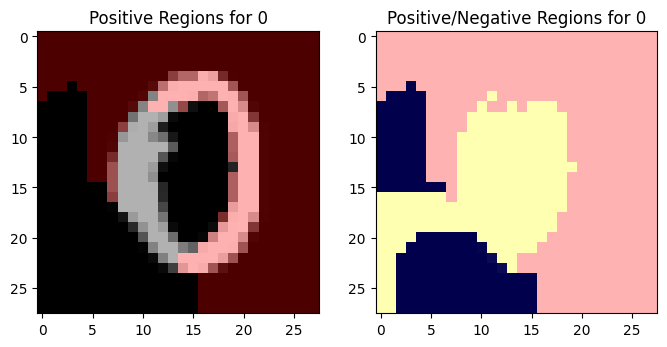

In [11]:
temp, mask = explanation.get_image_and_mask(y_test.values[0], positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test.values[0]))
temp, mask = explanation.get_image_and_mask(y_test.values[0], positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test.values[0]))

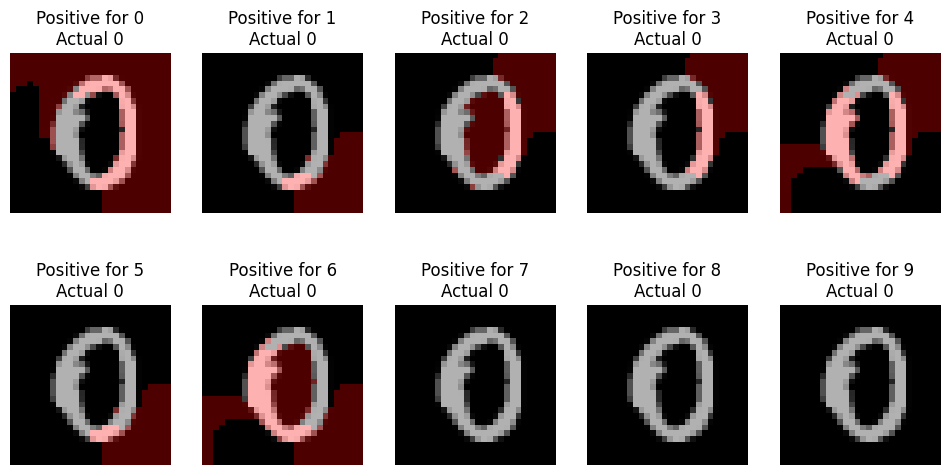

In [12]:
# now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=1000, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,X_test[0], bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(i, y_test.values[0]))
    c_ax.axis('off')

# Gaining Insight
Can we find an explanation for a classification the algorithm got wrong

In [13]:
pipe_pred_test = simple_nn_pipeline.predict(X_test)
np.random.seed(0)
wrong_idx = np.random.choice(np.where(pipe_pred_test!=y_test)[0])
print('Using #{} where the label was {} and the pipeline predicted {}'.format(wrong_idx, y_test.values[wrong_idx], pipe_pred_test[wrong_idx]))

Using #25862 where the label was 4 and the pipeline predicted 6


In [14]:
%%time
explanation = explainer.explain_instance(X_test[wrong_idx],
                                         classifier_fn = simple_nn_pipeline.predict_proba,
                                         top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 5.17 s, sys: 1.52 s, total: 6.69 s
Wall time: 5.18 s


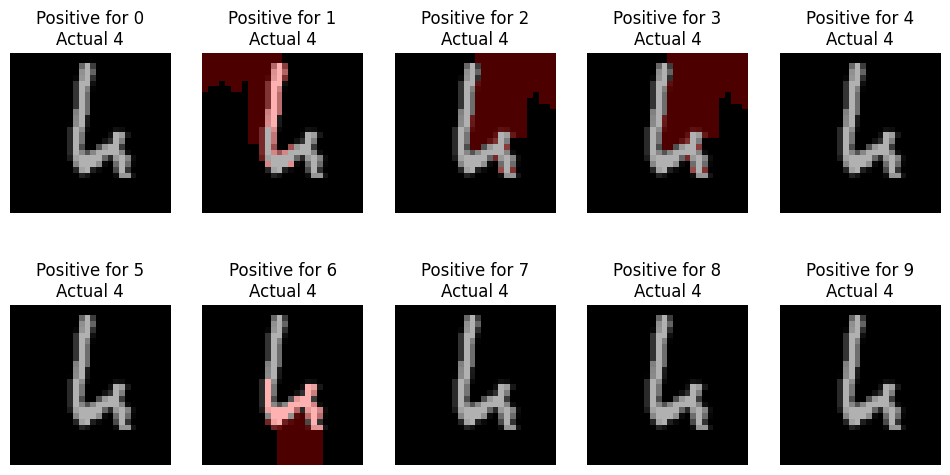

In [15]:
# now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(i, y_test.values[wrong_idx]))
    c_ax.axis('off')

Explain why the model misclassified this example based on the output of LIME:

The '4' written in this example already doesn't look like a '4' but rather like an 'h'.
For the model misclassifying a '1', LIME seemed to highlight the vertical stroke of '1'. For '2', LIME seemed to highlight the portion that looks like the bottom-right part of a '2'. I am not sure about '3', but LIME is also highlighting the corner piece of the stroke, which could resemble the middle part of a '3'. For '6', LIME seemed to highlight the bottom portion that may have been mistaken for the loop in a '6'.